In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from itables import show
import os
import glob
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,10)
sns.set() # plot styles
tqdm.pandas()
#files = sorted(glob.glob("data/classified/climate_tweets_*.csv"))
#print(files)
pd.set_option('display.max_colwidth', -1)

<ipython-input-1-7b6c634af4d4>:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
#%%time
#df = pd.concat(pd.read_csv(f, sep=";", engine="c", lineterminator="\n") for f in tqdm(files))

In [3]:
#%%time
# Save datasets of unique users and ids for bot scoring. Takes ~13min
#df[["username", "user_id"]].value_counts().to_csv("data/users.csv")

In [4]:
df = pd.read_csv("data/botscores.csv").dropna()
df

,user_id,screen_name,prob_bot,n_tweets
0,731164510489313280,GCCThinkActTank,0.368905,63791
1,330509973,annemariayritys,0.007271,47821
2,176470818,Vandahmier,0.159065,41108
4,2365497828,ZEROCO2_,0.001946,31124
5,2915468150,climate_u,0.980588,29386
...,...,...,...,...
363424,627475553,R_Aherin,0.001364,12
363425,904884679,Frag_IDMA,0.001226,12
363426,73278102,CanadianMomEh,0.000799,12
363427,754202244287963136,ronald_asuman,0.000794,12


Text(0.5, 0, 'Bot score')

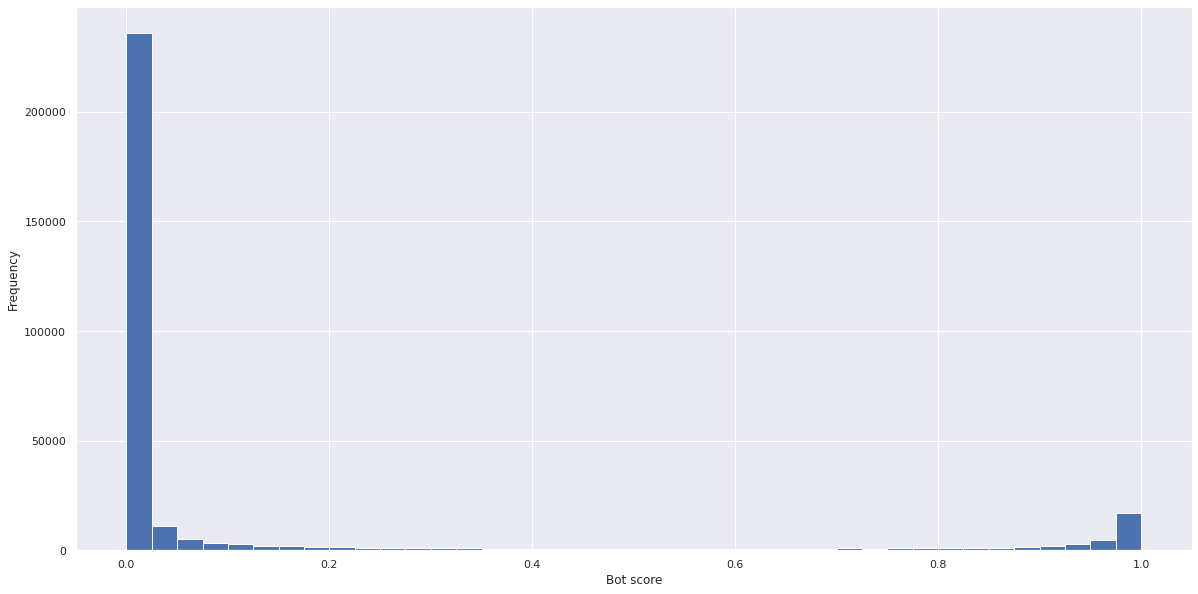

In [5]:
df.prob_bot.plot(kind="hist", bins=40)
plt.xlabel("Bot score")

Text(0, 0.5, '# climate change tweets')

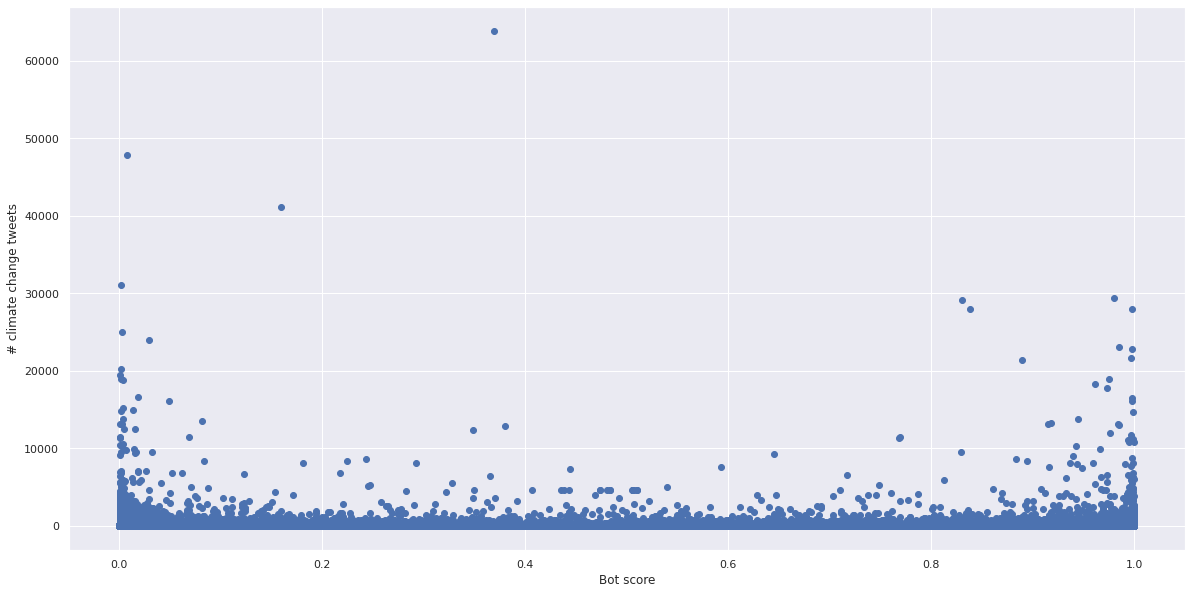

In [6]:
plt.scatter(df.prob_bot, df.n_tweets)
plt.xlabel("Bot score")
plt.ylabel("# climate change tweets")

<AxesSubplot:ylabel='Frequency'>

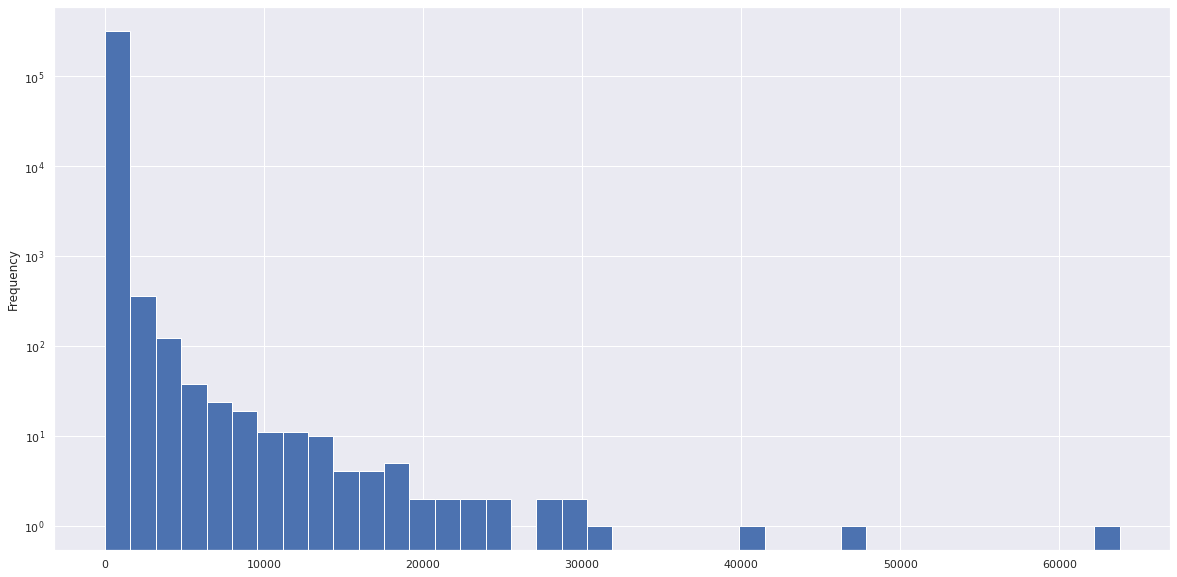

In [7]:
df.n_tweets.plot(kind="hist", bins=40, logy=True)

Text(0, 0.5, '% bots')

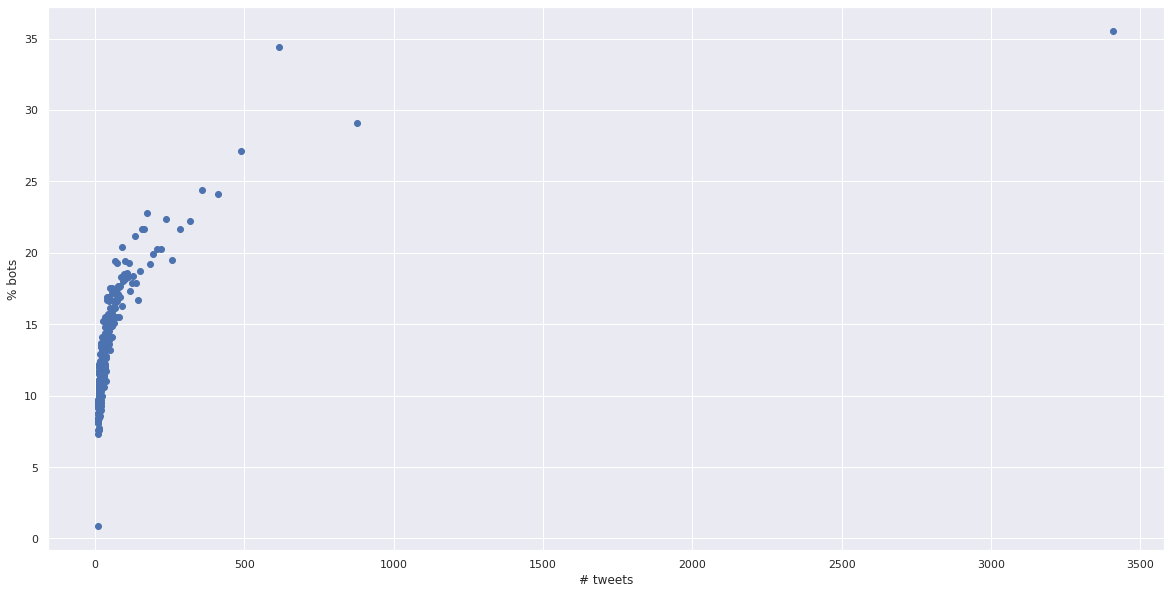

In [47]:
import matplotlib.colors as colors
x = []
y = []
chunk = 1000
for n in range(0, len(df), chunk):
    filtered_df = df.iloc[n:n+chunk]
    bots = sum(filtered_df.prob_bot > .5)
    n_tweets = filtered_df.n_tweets.mean()
    if not bots and not humans:
        continue
    elif bots and not humans:
        pct = 100
    else:
        pct = bots / chunk * 100
    x.append(n_tweets)
    y.append(pct)
plt.scatter(x,y)
plt.xlabel("# tweets")
plt.ylabel("% bots")